In [19]:
import numpy as np
import matplotlib.pyplot as plt
import schedule
import fun
import time
import Simulated_annealing
import Gradient_descent
import schedule
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
pi = np.pi

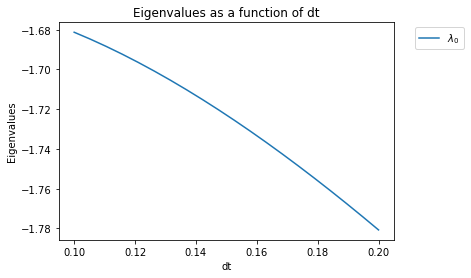

In [22]:
#creating Hamiltonian
m = 5 #H_mxm
H_num_coeff = m + int(m*(m+1)/2)
H_coeff = np.random.randn(H_num_coeff)
HA,HB = fun.sym_matrix(m,H_coeff)
dt = np.linspace(0.1,0.2,20)
#E_true,vt = fun.En_loop(dt,HA,HB,1)
E_true,v0 = fun.Emin_loop(dt,HA,HB)
#ploting m eigvenvalue as a function of dt
plt.plot(dt,E_true,label =f'$\lambda_{0}$')
plt.legend()
plt.xlabel('dt')
plt.ylabel('Eigenvalues')
plt.title('Eigenvalues as a function of dt')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

In [23]:
epoch = 10
n               = 5 #size of M = A+Bdt
n_coeff         = n + int(n*(n+1)/2) #number of matrix elements
iters           = 10000
T0              = 1 #initial Temp
Tn              = 1e-6 #final Temp
beta            = 1
SA_coeff,SA_cost = Simulated_annealing.random_initial(E_true, dt, n, n_coeff,T0,Tn,beta,iters,epoch)
print('SSE:',SA_cost)

SSE: 9.634870459069622e-12


In [24]:
n               = 5 #size of M = A+Bdt
n_coeff         = n + int(n*(n+1)/2) #number of matrix elements
iters           = 1000
T0              = 1 #initial Temp
Tn              = 1e-6 #final Temp
beta            = 1
Ts = schedule.TemperatureSchedules()
T = np.array(Ts.exponential_logarithmic_schedule(T0, Tn, iters))
tol = 1e-20
SA0_coeff = SA_coeff
SA0_cost = SA_cost
for i in range(100):
    SA1_coeff, SA1_cost = Simulated_annealing.tempering2(E_true, dt, n, SA0_coeff, (100*i)*T, T0, 1e-3, iters)
    print('Iteration', i, 'SSE:', SA1_cost)
    if abs(SA1_cost - SA0_cost) < tol:
        break
    SA0_coeff = SA1_coeff
    SA0_cost = SA1_cost

C:\Users\danny\MEE\1st_state\Simulated_annealing.py:85: RuntimeWarning: invalid value encountered in double_scalars
  if proposed_cost < current_cost or np.random.rand() < np.exp(-dE / T):
C:\Users\danny\MEE\1st_state\Simulated_annealing.py:99: RuntimeWarning: invalid value encountered in double_scalars
  if np.random.rand() < np.exp((current_cost - proposed_cost) / T):


Iteration 0 SSE: 2.4837521402121328e-12
Iteration 1 SSE: 1.3786506031359842e-13
Iteration 2 SSE: 9.994546058237525e-14
Iteration 3 SSE: 9.371310677033874e-14
Iteration 4 SSE: 6.352806914537537e-14
Iteration 5 SSE: 5.109473280846126e-14
Iteration 6 SSE: 4.640037389437055e-14
Iteration 7 SSE: 4.454564705479805e-14
Iteration 8 SSE: 4.1605242354279235e-14
Iteration 9 SSE: 3.02363838078299e-14
Iteration 10 SSE: 2.950112132278199e-14
Iteration 11 SSE: 2.3788410219909544e-14
Iteration 12 SSE: 2.373276720943036e-14
Iteration 13 SSE: 2.307087006185329e-14
Iteration 14 SSE: 2.3058293527592186e-14
Iteration 15 SSE: 2.303336266277804e-14
Iteration 16 SSE: 2.1017654160440974e-14
Iteration 17 SSE: 2.0261743779034758e-14
Iteration 18 SSE: 1.9990335800779437e-14
Iteration 19 SSE: 1.900847687010166e-14
Iteration 20 SSE: 1.8755026430885526e-14
Iteration 21 SSE: 1.824935994820974e-14
Iteration 22 SSE: 1.6860621164253256e-14
Iteration 23 SSE: 1.6464899132536358e-14
Iteration 24 SSE: 1.631110983044772e-14


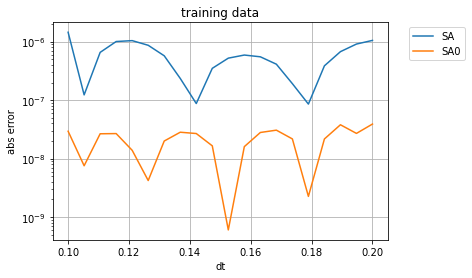

In [29]:
SA_E_pred,va = fun.fun(dt, n, SA_coeff)
SA0_E_pred,va = fun.fun(dt, n, SA0_coeff)
plt.plot(dt,abs(SA_E_pred-E_true),label='SA')
plt.plot(dt,abs(SA0_E_pred-E_true),label='SA0')
plt.xlabel('dt')
plt.ylabel('abs error')
plt.title('training data')
plt.yscale('log')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

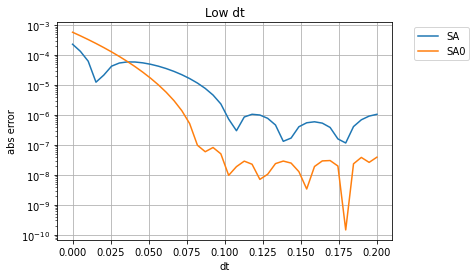

In [30]:
dt0 = np.linspace(1e-9,0.2,40)
E0_true,vt0 = fun.Emin_loop(dt0,HA,HB)
SA_E0_pred,va0 = fun.fun(dt0, n, SA_coeff)
SA0_E0_pred,va0 = fun.fun(dt0, n, SA0_coeff)
plt.plot(dt0,abs(SA_E0_pred-E0_true),label='SA')
plt.plot(dt0,abs(SA0_E0_pred-E0_true),label='SA0')
plt.xlabel('dt')
plt.ylabel('abs error')
plt.title('Low dt')
plt.yscale('log')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()